In [1]:
import os
import time
import shutil
import pickle

import torch
import torch.nn.functional as F

from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
# from tensorboard_logger import configure, log_value

from model import RecurrentAttention
from utils import AverageMeter

from torchvision import transforms, utils, models
from PIL import Image

import torch

import utils
import data_loader

from trainer import Trainer
from config import get_config

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import pandas as pd

In [2]:
def load_inputs(impath):
    to_tens = transforms.ToTensor()
    return to_tens(Image.open(impath).convert('RGB')).unsqueeze(0)

In [3]:
import json

In [4]:
# type(mig_data)

In [5]:
m = open("../pooling/data/migration_data.json",)
mig_data = json.load(m)
m.close()
mig_data = pd.DataFrame.from_dict(mig_data, orient = 'index').reset_index()
mig_data.columns = ['muni_id', 'num_migrants']
mig_data['class'] = pd.cut(mig_data['num_migrants'], bins = 10, labels = [i for i in range(10)])
mig_data

muni_id  num_migrants class
0     484001001       42055.0     3
1     484001002        4017.0     0
2     484001003       11992.0     1
3     484001004         762.0     0
4     484001005        7551.0     0
...         ...           ...   ...
2326  484032049        2487.0     0
2327  484032050        2024.0     0
2328  484032051        3084.0     0
2329  484032052        2919.0     0
2330  484032053        2119.0     0

[2331 rows x 3 columns]

In [6]:
def get_png_names(directory):
    images = []
    for i in os.listdir(directory):
        try:
            if os.path.isdir(os.path.join(directory, i)):
                new_path = os.path.join(directory, i, "pngs")
                image = os.listdir(new_path)[0]
                images.append(os.path.join(directory, i, "pngs", image))
        except:
            pass
    return images


            

image_names = get_png_names("../attn/data/MEX/")

ys = []
for i in image_names:
        dta = mig_data[mig_data["muni_id"] == i.split("/")[4]]
        if len(dta) != 0:
            ys.append(dta['class'].values[0])

In [106]:
batch_size = 1

# train = [(load_inputs(image_paths[i]).squeeze()[:, 0:28, 0:28], ys[i]) for i in range(0, 93)]
# val = [(load_inputs(image_paths[i]).squeeze()[:, 0:28, 0:28], ys[i]) for i in range(93, 133)]

train = [(load_inputs(image_names[i]).squeeze(), ys[i]) for i in range(0, 500)]
val = [(load_inputs(image_names[i]).squeeze(), ys[i]) for i in range(500, 600)]


train_dl = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
val_dl = torch.utils.data.DataLoader(val, batch_size = batch_size, shuffle = True)

In [107]:
import numpy as np
from utils import plot_images

import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [108]:
config, unparsed = get_config()

In [109]:
trainer = Trainer(config, (train_dl, val_dl))

D_in 7500


In [110]:
adp_pool = torch.nn.AdaptiveMaxPool1d((2000))
test = torch.rand(1, 2850)

adp_pool(test.unsqueeze(0)).squeeze(0).shape

torch.Size([1, 2000])

In [111]:
# for i,o in train_dl:
#     print(i.shape)

In [ ]:
trainer.train()

0.2s - loss: 2.282 - acc: 0.000:   2%|▏         | 2/93 [00:00<00:08, 10.77it/s]


[*] Train on 93 samples, validate on 40 samples

Epoch: 1/200 - LR: 0.000300


17.7s - loss: 0.152 - acc: 100.000: : 500it [00:17, 28.29it/s]                    


train loss: 0.759 - train acc: 92.600 - val loss: 0.418 - val acc: 92.000 - val err: 8.000 [*]


0.2s - loss: 0.101 - acc: 100.000:   4%|▍         | 4/93 [00:00<00:03, 22.86it/s]


Epoch: 2/200 - LR: 0.000300


14.4s - loss: 0.108 - acc: 100.000: : 500it [00:14, 34.64it/s]                    
0.0s - loss: 0.127 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.513 - train acc: 93.000 - val loss: 0.518 - val acc: 92.000 - val err: 8.000

Epoch: 3/200 - LR: 0.000300


14.3s - loss: 0.031 - acc: 100.000: : 500it [00:14, 34.92it/s]                    
0.0s - loss: 0.040 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.559 - train acc: 93.000 - val loss: 0.471 - val acc: 92.000 - val err: 8.000

Epoch: 4/200 - LR: 0.000300


15.4s - loss: 1.128 - acc: 100.000: : 500it [00:15, 32.49it/s]                    
0.0s - loss: 2.411 - acc: 0.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.597 - train acc: 93.000 - val loss: 0.952 - val acc: 92.000 - val err: 8.000

Epoch: 5/200 - LR: 0.000300


15.2s - loss: 0.090 - acc: 100.000: : 500it [00:15, 32.87it/s]                    
0.0s - loss: 0.081 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.498 - train acc: 93.000 - val loss: 0.407 - val acc: 92.000 - val err: 8.000

Epoch: 6/200 - LR: 0.000300


14.8s - loss: 0.013 - acc: 100.000: : 500it [00:14, 33.80it/s]                    
0.0s - loss: 0.021 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.664 - train acc: 93.000 - val loss: 0.564 - val acc: 92.000 - val err: 8.000

Epoch: 7/200 - LR: 0.000300


14.5s - loss: 0.560 - acc: 100.000: : 500it [00:14, 34.55it/s]                    
0.0s - loss: 0.473 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.679 - train acc: 93.000 - val loss: 0.762 - val acc: 92.000 - val err: 8.000

Epoch: 8/200 - LR: 0.000300


15.2s - loss: 0.051 - acc: 100.000: : 500it [00:15, 32.80it/s]                    
0.0s - loss: 6.216 - acc: 0.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.510 - train acc: 93.000 - val loss: 0.415 - val acc: 92.000 - val err: 8.000

Epoch: 9/200 - LR: 0.000300


14.9s - loss: 0.118 - acc: 100.000: : 500it [00:14, 33.64it/s]                    
0.0s - loss: 0.204 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.501 - train acc: 93.000 - val loss: 0.524 - val acc: 92.000 - val err: 8.000

Epoch: 10/200 - LR: 0.000300


15.2s - loss: 0.466 - acc: 100.000: : 500it [00:15, 32.96it/s]                    
0.0s - loss: 3.268 - acc: 0.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.457 - train acc: 93.000 - val loss: 0.664 - val acc: 92.000 - val err: 8.000

Epoch: 11/200 - LR: 0.000300


14.8s - loss: 4.462 - acc: 0.000: : 500it [00:14, 33.74it/s]                      
0.0s - loss: 0.069 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.451 - train acc: 93.000 - val loss: 0.414 - val acc: 92.000 - val err: 8.000

Epoch: 12/200 - LR: 0.000300


15.5s - loss: 3.672 - acc: 0.000: : 500it [00:15, 32.30it/s]                      
0.0s - loss: 0.026 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.529 - train acc: 93.000 - val loss: 0.460 - val acc: 92.000 - val err: 8.000

Epoch: 13/200 - LR: 0.000300


15.4s - loss: 0.073 - acc: 100.000: : 500it [00:15, 32.54it/s]                    
0.0s - loss: 0.030 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.492 - train acc: 93.000 - val loss: 0.437 - val acc: 92.000 - val err: 8.000

Epoch: 14/200 - LR: 0.000300


14.7s - loss: 0.096 - acc: 100.000: : 500it [00:14, 33.92it/s]                    
0.0s - loss: 0.134 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.446 - train acc: 93.000 - val loss: 0.411 - val acc: 92.000 - val err: 8.000

Epoch: 15/200 - LR: 0.000300


14.8s - loss: 4.614 - acc: 0.000: : 500it [00:14, 33.79it/s]                      
0.0s - loss: 0.336 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.430 - train acc: 93.000 - val loss: 0.523 - val acc: 92.000 - val err: 8.000

Epoch: 16/200 - LR: 0.000300


14.7s - loss: 0.060 - acc: 100.000: : 500it [00:14, 34.03it/s]                    
0.0s - loss: 0.039 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.480 - train acc: 93.000 - val loss: 0.412 - val acc: 92.000 - val err: 8.000

Epoch: 17/200 - LR: 0.000300


5.2s - loss: 0.039 - acc: 100.000: : 181it [00:05, 35.11it/s]                     

In [15]:
import pickle
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from utils import denormalize, bounding_box

import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image


In [16]:
# def bounding_box(x, y, size, color="w"):
# #     x = int(x - (size / 2))
# #     print(x)
# #     y = int(y - (size / 2))
# #     print(y)
#     rect = patches.Rectangle(
#         (x, y), size, size, linewidth=1, edgecolor=color, fill=False
#     )
#     return rect


In [17]:
# % matplotlib inline

In [103]:
def plot(plot_dir, epoch):
    # read in pickle files
    glimpses = pickle.load(open(plot_dir + "g_{}.p".format(epoch), "rb"))
    locations = pickle.load(open(plot_dir + "l_{}.p".format(epoch), "rb"))
    
#     print(locations)

    from ipdb import set_trace

#     set_trace()

    glimpses = np.concatenate(glimpses)
    glimpses = np.expand_dims(glimpses, axis = 0)
    
#     print(glimpses.shape)

    # grab useful params
    size = int(plot_dir.split("_")[2].split("x")[0])
    num_anims = len(locations)
    num_cols = glimpses.shape[0]
    img_shape = glimpses.shape[2]
    
#     print(glimpses.shape)
#     print(size)

    # denormalize coordinates
    coords = [denormalize(img_shape, l) for l in locations]
    
    if num_cols == 1:
        
#         fig = plt.subplot(111)

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        
        plt.imshow(np.transpose(glimpses[0], (1,2,0)), cmap="Greys_r")
#         plt.get_xaxis().set_visible(False)
#         plt.get_yaxis().set_visible(False)   
        
        def updateData(i):
            color = "r"
            co = coords[i]
#             print(co)
#             for j, ax in enumerate(axs.flat):
            for p in ax.patches:
                p.remove()
            c = co[0]
            rect = bounding_box(c[0], c[1], size, color)
            ax.add_patch(rect)
        
        # animate
        anim = animation.FuncAnimation(
            fig, updateData, frames = num_anims, interval=500, repeat=True
        )

        # save as mp4
        name = plot_dir + "epoch_{}.mp4".format(epoch)
        anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])        
        
    else:
    
#         print(coords)

        fig, axs = plt.subplots(nrows=1, ncols=num_cols)
        # fig.set_dpi(100)

        # plot base image
        for j, ax in enumerate(axs.flat):
            print(glimpses[j].shape)
            ax.imshow(np.transpose(glimpses[j], (1,2,0)), cmap="Greys_r")
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        def updateData(i):
            color = "r"
            co = coords[i]
            for j, ax in enumerate(axs.flat):
                for p in ax.patches:
                    p.remove()
                c = co[j]
                rect = bounding_box(c[0], c[1], size, color)
                ax.add_patch(rect)

        # animate
        anim = animation.FuncAnimation(
            fig, updateData, frames = num_anims, interval=500, repeat=True
        )

        # save as mp4
        name = plot_dir + "epoch_{}.mp4".format(epoch)
        anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])


In [104]:
# !pip install ipdb

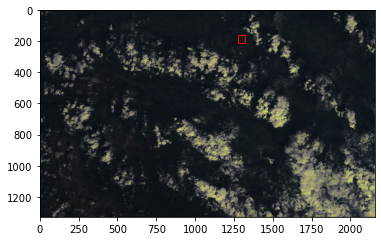

In [105]:
# plot("./plots/ram_6_50x50_1/", 19)

In [75]:
for i,o in train_loader:
    hm = i
    
    dsfa

NameError: name 'train_loader' is not defined

In [15]:
import matplotlib.pyplot as plt

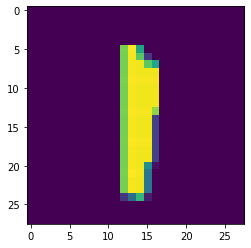

In [16]:
plt.imshow(np.transpose(hm[0], (1,2,0)))

In [17]:
B, C, H, W = hm.shape
size = 8

In [18]:
start[:, 0]

tensor([15.5967, 15.5128, 15.2684, 14.9213, 14.0713, 14.7086, 16.8820, 15.1699])

In [20]:
start = torch.tensor([[15.596725, 15.099442],
       [15.512785, 13.005841],
       [15.268352, 13.694261],
       [14.921265, 14.950024],
       [14.071263, 14.090788],
       [14.708624, 12.661836],
       [16.881996, 14.372852],
       [15.169943, 14.500135]])

# start = start[:, 0]

end = start + size

end

tensor([[23.5967, 23.0994],
        [23.5128, 21.0058],
        [23.2684, 21.6943],
        [22.9213, 22.9500],
        [22.0713, 22.0908],
        [22.7086, 20.6618],
        [24.8820, 22.3729],
        [23.1699, 22.5001]])

In [21]:
hm_padded = F.pad(hm, (size // 2, size // 2, size // 2, size // 2))

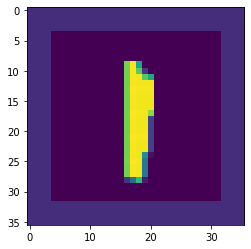

In [22]:
plt.imshow(np.transpose(hm_padded[0], (1,2,0)))

In [25]:
end

tensor([[23.5967, 23.0994],
        [23.5128, 21.0058],
        [23.2684, 21.6943],
        [22.9213, 22.9500],
        [22.0713, 22.0908],
        [22.7086, 20.6618],
        [24.8820, 22.3729],
        [23.1699, 22.5001]])

In [28]:
end[0, 1]

tensor(23.0994)

In [32]:
hm_padded[i, :, start[i, 1] : end[i, 1], start[i, 0] : end[i, 0]

TypeError: slice indices must be integers or None or have an __index__ method

In [23]:
patch = []
for i in range(B):
    patch.append(hm_padded[i, :, start[i, 1] : end[i, 1], start[i, 0] : end[i, 0]])

TypeError: only integer tensors of a single element can be converted to an index

In [ ]:
        B, C, H, W = x.shape

        start = self.denormalize(H, l)
        end = start + size

        # pad with zeros
        x = F.pad(x, (size // 2, size // 2, size // 2, size // 2))

        # loop through mini-batch and extract patches
        patch = []
        for i in range(B):
            patch.append(x[i, :, start[i, 1] : end[i, 1], start[i, 0] : end[i, 0]])
        return torch.stack(patch)

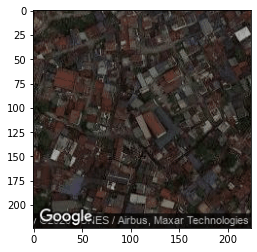

In [30]:
plt.imshow(np.transpose(np.array(train[0][0]), (1,2,0)))#.permute(1,2,0))